In [1]:
# Importing the required packages

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # for decision tree object
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder    # for train test splitting
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier   # for checking test results
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report   # for visualizing tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Fuction importing Dataset
def importdata():
    bike_pca = pd.read_csv("../PCA/bike_season_as_no.csv")

    # Printing the dataset shape
    print("Dataset Length: ", len(bike_pca))
    print("Dataset Shape: ", bike_pca.shape)

    # Printing the data observations
    print("Dataset: ", bike_pca.head())
    return bike_pca


In [3]:
bike_pca = importdata()

Dataset Length:  8760
Dataset Shape:  (8760, 17)
Dataset:     Unnamed: 0        datetime       date  hour  season     holiday open  \
0           1  1/12/2017 0:00  1/12/2017     0  Winter  No Holiday  Yes   
1           2  1/12/2017 1:00  1/12/2017     1  Winter  No Holiday  Yes   
2           3  1/12/2017 2:00  1/12/2017     2  Winter  No Holiday  Yes   
3           4  1/12/2017 3:00  1/12/2017     3  Winter  No Holiday  Yes   
4           5  1/12/2017 4:00  1/12/2017     4  Winter  No Holiday  Yes   

   temperature  humidity  wind_speed  visibility  dewpoint_temp  \
0         -5.2        37         2.2       20000          -17.6   
1         -5.5        38         0.8       20000          -17.6   
2         -6.0        39         1.0       20000          -17.7   
3         -6.2        40         0.9       20000          -17.6   
4         -6.0        36         2.3       20000          -18.6   

   solar_radiation  rainfall  snowfall  season_no  rent_count  
0              0.0     

In [4]:

bike_pca['month'] = pd.DatetimeIndex(bike_pca['datetime']).month
bike_pca['day'] = pd.DatetimeIndex(bike_pca['datetime']).day
bike_pca['weekday'] = pd.DatetimeIndex(bike_pca['datetime']).dayofweek

In [5]:
bike_pca.columns

Index(['Unnamed: 0', 'datetime', 'date', 'hour', 'season', 'holiday', 'open',
       'temperature', 'humidity', 'wind_speed', 'visibility', 'dewpoint_temp',
       'solar_radiation', 'rainfall', 'snowfall', 'season_no', 'rent_count',
       'month', 'day', 'weekday'],
      dtype='object')

In [6]:
# Dropping the date columns
bike_pca.drop(columns = ["Unnamed: 0", "datetime", "date", "hour", "season"], inplace = True)

bike_pca.head()

,holiday,open,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,season_no,rent_count,month,day,weekday
0,No Holiday,Yes,-5.2,37,2.2,20000,-17.6,0.0,0.0,0,4,254,1,12,3
1,No Holiday,Yes,-5.5,38,0.8,20000,-17.6,0.0,0.0,0,4,204,1,12,3
2,No Holiday,Yes,-6.0,39,1.0,20000,-17.7,0.0,0.0,0,4,173,1,12,3
3,No Holiday,Yes,-6.2,40,0.9,20000,-17.6,0.0,0.0,0,4,107,1,12,3
4,No Holiday,Yes,-6.0,36,2.3,20000,-18.6,0.0,0.0,0,4,78,1,12,3


In [7]:
bike_pca.columns

Index(['holiday', 'open', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dewpoint_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'season_no', 'rent_count', 'month', 'day', 'weekday'],
      dtype='object')

In [8]:
bike_pca.describe()

,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,season_no,rent_count,month,day,weekday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.882922,58.226256,1.724909,14368.257991,4.073813,0.569111,0.148687,0.750685,2.490411,704.602055,6.526027,15.720548,3.021918
std,11.944825,20.362413,1.036300,6082.987120,13.060369,0.868746,1.128193,4.367462,1.116831,644.997468,3.448048,8.796749,1.999994
min,-17.800000,0.000000,0.000000,270.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,3.500000,42.000000,0.900000,9400.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,191.000000,4.000000,8.000000,1.000000
50%,13.700000,57.000000,1.500000,16980.000000,5.100000,0.010000,0.000000,0.000000,2.000000,504.500000,7.000000,16.000000,3.000000
75%,22.500000,74.000000,2.300000,20000.000000,14.800000,0.930000,0.000000,0.000000,3.000000,1065.250000,10.000000,23.000000,5.000000
max,39.400000,98.000000,7.400000,20000.000000,27.200000,3.520000,35.000000,88.000000,4.000000,3556.000000,12.000000,31.000000,6.000000


In [9]:
bike_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          8760 non-null   object 
 1   open             8760 non-null   object 
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   dewpoint_temp    8760 non-null   float64
 7   solar_radiation  8760 non-null   float64
 8   rainfall         8760 non-null   float64
 9   snowfall         8760 non-null   int64  
 10  season_no        8760 non-null   int64  
 11  rent_count       8760 non-null   int64  
 12  month            8760 non-null   int64  
 13  day              8760 non-null   int64  
 14  weekday          8760 non-null   int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 1.0+ MB


In [10]:
bike_pca = bike_pca.loc[bike_pca["holiday"] != "No holiday"]
bike_pca = bike_pca.loc[bike_pca["open"] != "No"]

bike_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          8465 non-null   object 
 1   open             8465 non-null   object 
 2   temperature      8465 non-null   float64
 3   humidity         8465 non-null   int64  
 4   wind_speed       8465 non-null   float64
 5   visibility       8465 non-null   int64  
 6   dewpoint_temp    8465 non-null   float64
 7   solar_radiation  8465 non-null   float64
 8   rainfall         8465 non-null   float64
 9   snowfall         8465 non-null   int64  
 10  season_no        8465 non-null   int64  
 11  rent_count       8465 non-null   int64  
 12  month            8465 non-null   int64  
 13  day              8465 non-null   int64  
 14  weekday          8465 non-null   int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 1.0+ MB


In [11]:
bike_pca.head()

,holiday,open,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,season_no,rent_count,month,day,weekday
0,No Holiday,Yes,-5.2,37,2.2,20000,-17.6,0.0,0.0,0,4,254,1,12,3
1,No Holiday,Yes,-5.5,38,0.8,20000,-17.6,0.0,0.0,0,4,204,1,12,3
2,No Holiday,Yes,-6.0,39,1.0,20000,-17.7,0.0,0.0,0,4,173,1,12,3
3,No Holiday,Yes,-6.2,40,0.9,20000,-17.6,0.0,0.0,0,4,107,1,12,3
4,No Holiday,Yes,-6.0,36,2.3,20000,-18.6,0.0,0.0,0,4,78,1,12,3


In [12]:
bike_pca.drop(columns = ["holiday", "open"], inplace = True)

In [13]:
target = bike_pca["rent_count"]

df = bike_pca.copy()
df = df.drop("rent_count", axis = 1)
X = df

In [14]:
# Label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([252, 202, 171, ..., 685, 703, 579], dtype=int64)

In [15]:
y = target

In [16]:
# Splitting the dataset by 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training split input: ", X_train.shape)

print("Testing split input: ", X_test.shape)

Training split input:  (6772, 12)
Testing split input:  (1693, 12)


In [17]:
# Modeling Tree and testing 
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree CLassifier Created")

Decision Tree CLassifier Created


In [18]:
# Function to perform training with gini index
def train_gini(X_train, X_test, y_train):
    
    # Creating the classifier object
    gini_class = DecisionTreeClassifier(criterion = "gini", 
                                       random_state = 42, max_depth = 3)
    
    # Performing training
    gini_class.fit(X_train, y_train)
    return gini_class

# Function to calculate accuracy
def calculate_accuracy(y_test, y_pred):
    
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))


In [19]:
gini_class = train_gini(X_train, X_test, y_train)

In [20]:
# function to perform training with entropy
def train_entropy(X_train, X_test, y_train):
    
    # Decision tree with entropy
    class_entropy = DecisionTreeClassifier(
    criterion = "entropy", random_state = 100, max_depth = 3)
    
    # Performing training 
    class_entropy.fit(X_train, y_train)
    return class_entropy


In [21]:
class_entropy = train_entropy(X_train, X_test, y_train)
    

In [22]:
# Function to make predictions
def prediction(X_test, class_object):
    
    # Prediction on test with giniIndex
    y_pred = class_object.predict(X_test)
    print("Predicted values: ")
    print(y_pred)
    return y_pred


In [23]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [24]:
print("Results Using Gini Index:")

y_pred_gini = prediction(X_test, gini_class)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values: 
[594 594 594 ...  15 594 594]
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy :  0.23626698168930893
Report :                precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.02      1.00      0.05         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.

C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [25]:
print("Results Using Entropy:")

# Prediction using entropy
y_pred_entropy = prediction(X_test, class_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values: 
[915 836  15 ...  15 915 836]
Confusion Matrix:  [[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy :  0.11813349084465447
Report :                precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00 

C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [26]:
bike_pca.columns

Index(['temperature', 'humidity', 'wind_speed', 'visibility', 'dewpoint_temp',
       'solar_radiation', 'rainfall', 'snowfall', 'season_no', 'rent_count',
       'month', 'day', 'weekday'],
      dtype='object')

In [27]:
colnames = list(bike_pca.columns)
to_scale = colnames[:8]  #scaling specific columns changes the order of the columns so I had to label them back
remain = colnames[8:13]

features = bike_pca[colnames]
ct = ColumnTransformer([
            ('scaled_bike_pca', StandardScaler(), to_scale)
                    ], remainder = 'passthrough')

scaled_bike_pca = pd.DataFrame(ct.fit_transform(features))
scaled_bike_pca.columns = to_scale + remain

In [28]:
X_column_names = X_train.columns # just keeping track of the column names

In [29]:
#vectorising the data for the model to work
categorical_encoder = OneHotEncoder(handle_unknown = "ignore")
ct = ColumnTransformer(
    transformers = [("categorical", categorical_encoder, list(range(8,12)))]
    , remainder = 'passthrough'
)
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

In [30]:
model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R Squared Score:', (metrics.r2_score(y_test, y_pred)))

Explained Variance Score: 0.7720542351205237
Mean Squared Error: 71335.86504382752
R Squared Score: 0.7718351471785397


In [33]:
#sorting them
sorted_features = []
for feature, importance in zip(X.columns, model.feature_importances_):
    sorted_features.append((feature, importance))
sorted_features.sort(key = lambda x: x[1], reverse = True)

In [34]:
sorted_features

[('wind_speed', 0.02952904928387764),
 ('month', 0.00480512786872585),
 ('temperature', 0.003918956495455033),
 ('season_no', 0.0038486664958659825),
 ('weekday', 0.0037743391010999325),
 ('humidity', 0.0034691296395907697),
 ('rainfall', 0.002893732681166417),
 ('snowfall', 0.0025481635524018287),
 ('visibility', 0.00234137704532924),
 ('day', 0.0021720480780643534),
 ('solar_radiation', 0.001584579935973628),
 ('dewpoint_temp', 0.0013217934789455828)]

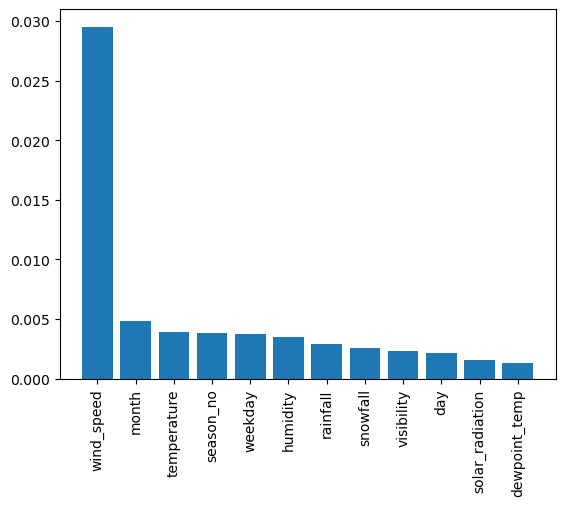

In [35]:
plt.bar([x[0] for x in sorted_features], [y[1] for y in sorted_features])
plt.xticks(rotation='vertical')
plt.show()